In [1]:
import collections
from collections import Counter

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import powerlaw
from powerlaw import *

import scipy.stats as stats

# Part 0

In [2]:
# parse the "blog.txt" into graph
G = nx.read_edgelist('Assignment2/blog.txt',create_using=nx.DiGraph)

# Part 1

## out-degree distribution

<AxesSubplot:>

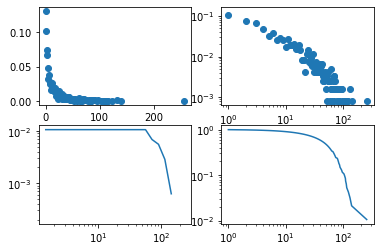

In [3]:
# Plot the out-degree distribution
N = G.number_of_nodes()
out_deg = [deg for (node,deg) in G.out_degree()]
degree_count = dict(Counter(out_deg))

#degree probability pairs
degree_probs = [(degree,count/N) for (degree,count) in degree_count.items()]
degree = [degree for (degree,p_k) in degree_probs]
p_k_all = [p_k for (degree,p_k) in degree_probs]

############ out degree
fig1,axs1 = plt.subplots(2,2)
axs1[0,0].scatter(degree,p_k_all)

axs1[0,1].scatter(degree,p_k_all)
axs1[0,1].set_yscale('log')
axs1[0,1].set_xscale('log')


#remove degree 0 for log scale
degree.remove(0)
plot_pdf(degree,ax=axs1[1,0])
plot_ccdf(degree,ax=axs1[1,1])

<AxesSubplot:>

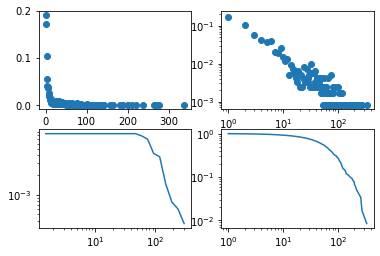

In [4]:
# Plot the in-degree distribution
in_deg = [deg for (node,deg) in G.in_degree()]
degree_count = dict(Counter(in_deg))

#degree probability pairs
in_degree_probs = [(degree,count/N) for (degree,count) in degree_count.items()]
in_degree = [degree for (degree,p_k) in in_degree_probs]
p_k_all = [p_k for (degree,p_k) in in_degree_probs]

############ in degree

fig2,axs2 = plt.subplots(2,2)
axs2[0,0].scatter(in_degree,p_k_all)
axs2[0,0].set_xlabel('Linear,Linear')


axs2[0,1].scatter(in_degree,p_k_all)
axs2[0,1].set_yscale('log')
axs2[0,1].set_xscale('log')

#remove degree 0 for log scale
in_degree.remove(0)
plot_pdf(in_degree,ax=axs2[1,0])
plot_ccdf(in_degree,ax=axs2[1,1])

### From left to right, top to bottom: Linear Scale, log-log linear binning, log-log log binning, cumulative

$$ P_k = \dfrac{N_k}{N}$$

$$ P_k \sim (k + K_0)^{\gamma}$$ 

### Fitting Without xmax

(I encountered a scipy dependency error here that I could not resolve)

In [5]:
#fit the out-degree distributon without xmax

in_fit = powerlaw.Fit(in_degree,discrete = True)
print('in alpha: ', in_fit.alpha, 'in xmin: ',in_fit.xmin)

in alpha:  3.3198351498737098 in xmin:  94.0


Calculating best minimal value for power law fit
/Users/jarodw/miniforge3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/Users/jarodw/miniforge3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


In [6]:
out_fit = powerlaw.Fit(degree,discrete = True)
print('out alpha: ', out_fit.alpha, 'out xmin: ', out_fit.xmin)

out alpha:  5.907036590931355 out xmin:  103.0


Calculating best minimal value for power law fit


## Fitting with xmax

**0's removed. Warning persists**

In [7]:
# Plot the out-degree distribution
in_fit = powerlaw.Fit(in_degree,discrete = True,xmax=300)
print('in alpha: ', in_fit.alpha, 'in xmin: ',in_fit.xmin)

in alpha:  1.9475560671062895 in xmin:  54.0


Calculating best minimal value for power law fit
/Users/jarodw/miniforge3/lib/python3.9/site-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/Users/jarodw/miniforge3/lib/python3.9/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


In [8]:
out_fit = powerlaw.Fit(degree,discrete = True,xmax=200)
print('out alpha: ', out_fit.alpha, 'out xmin: ', out_fit.xmin)

Calculating best minimal value for power law fit


out alpha:  2.3216241272924742 out xmin:  42.0


# Part 2

## Q1

In [9]:
# Compute the Pearson correlation coefficieient
#reload graph as undirected
G = nx.read_edgelist('Assignment2/blog.txt')

r = nx.degree_pearson_correlation_coefficient(G)

node_count = G.number_of_nodes()

#test stat

T = (r*np.sqrt(node_count-2)/np.sqrt(1-(r**2)))

from scipy.stats import t
#must use abs
p_val = t.sf(abs(T),2)
p_val

0.007770001071065256

**Based on the result, do you think this network is assortative, disassortative or neutral? write 1-2 sentence(s) to state your conclusion and reasons.**

A negative correlation coefficient is indicative of a disassortative network. The p-value is statistically significant so we can reject the null hypothesis.

## Q2

In [10]:
# Plot the average(average neighbor degree) as a function of the node degree k

degree = [degree for node,degree in list(G.degree())]
avg_nb = [b for (a,b) in nx.average_neighbor_degree(G).items()]

df = pd.DataFrame(list(zip(degree, avg_nb)),columns=['deg', 'avg'])
results = df.groupby('deg').mean('avg')


0.0015591080265674037

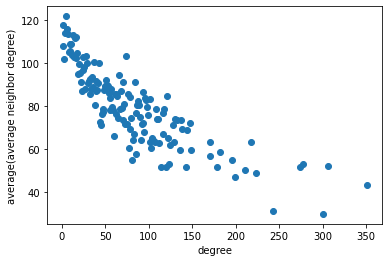

In [11]:
plt.scatter(results.index,results.avg)
plt.xlabel('degree')
plt.ylabel('average(average neighbor degree)')

from scipy import stats
r,p = stats.pearsonr(results.index,results.avg) #stat signif but must use t-test?
r,p

#N is number of elements in unique degree set
N = len(results.index)

T = (r*np.sqrt(N-2)/np.sqrt(1-(r**2)))

from scipy.stats import t
#must use abs
p_val = t.sf(abs(T),2)
p_val

This analysis also indicates the network is disassortative.Further, the p value is statistiaclly significant and we can reject the null hypothesis here as well. 

# Part 3

## Q1

In [12]:
# Plot the diameters of the LCC and the 100 G(n,p) networks
# parse the "blog.txt" into graph
G = nx.read_edgelist('Assignment2/blog.txt',create_using=nx.DiGraph)
scc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
G_0 = G.subgraph(scc[0]).to_undirected()

n = G_0.number_of_nodes()
E = G_0.number_of_edges()
p = (2*E)/((n)*(n-1))

d_0 = nx.diameter(G_0)

In [13]:
all_graphs = [nx.gnp_random_graph(n,p,seed=i) for i in range(1,100)]

diameters_all = list(map(nx.diameter, all_graphs))

Text(0.5, 1.0, 'Distibution of G(n,p) graphs and Diameter of G_0')

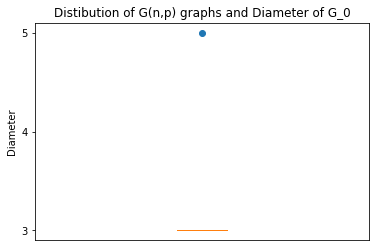

In [14]:
plt.boxplot(diameters_all)
plt.yticks(list(range(1,6)))
plt.ylabel('Diameter')
plt.xticks(np.arange(1))
plt.scatter(1,d_0)
plt.title('Distibution of G(n,p) graphs and Diameter of G_0')



## Q2

Text(0, 0.5, 'Avg.Shortest Path')

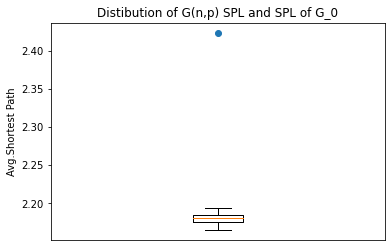

In [15]:
# Plot the average shortest path length of the LCC and the 100 G(n,p) networks

spl_0 = nx.average_shortest_path_length(G_0)

spl_all = list(map(nx.average_shortest_path_length, all_graphs))
spl_all

plt.boxplot(spl_all)
plt.scatter(1,spl_0)
plt.title('Distibution of G(n,p) SPL and SPL of G_0')
plt.xticks(np.arange(1))
plt.ylabel('Avg.Shortest Path')

## Q3

Use the one-sample t-test to examine if the diameter of the undirected network is significantly different than the diameter of the random networks at a 95% significance level? What about the average shortest path length?

In [16]:
stats.ttest_1samp(diameters_all,d_0)

stats.ttest_1samp(spl_all,spl_0)

Ttest_1sampResult(statistic=-410.1943564484653, pvalue=2.454941768681692e-160)

We can reject $ H_0 $ , the means are significantly different. The G(n,p) graphs differ from the blog graph. 

# Part 4

## Q1

KstestResult(statistic=0.9508196721311475, pvalue=0.0)

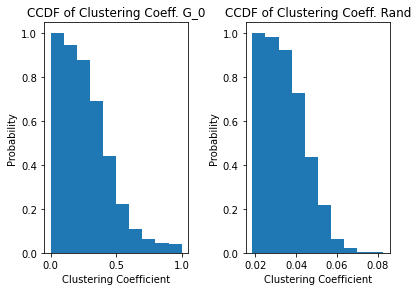

In [17]:
# Plot the clustering coefficient of the LCC and a G(n,p) network in CCDF format
random_graph = nx.gnp_random_graph(n,p,seed=123)
ccs_blog = nx.clustering(G_0)
ccs_rand = nx.clustering(random_graph)

############ in degree
fig3,axs3 = plt.subplots(1,2)


axs3[0].hist(ccs_blog.values(),density=True,cumulative=-1)
axs3[0].set_xlabel('Clustering Coefficient')
axs3[0].set_ylabel('Probability')
axs3[0].set_title('CCDF of Clustering Coeff. G_0')


plt.hist(ccs_rand.values(),density=True,cumulative=-1)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Probability')
plt.title('CCDF of Clustering Coeff. Rand')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

stats.ks_2samp(list(ccs_blog.values()),list(ccs_rand.values()))

Are the two distributions significantly different?

We can reject the null hypothesis that the two distibutions are the same.

## Q2

Text(0, 0.5, 'avg. cluster coeff')

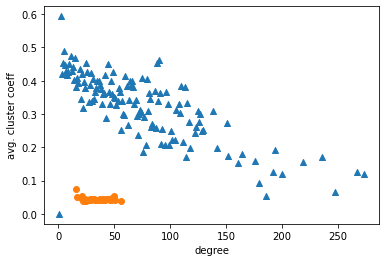

In [18]:
# Plot the average clustering coefficient as a function of the node degree
######## data prep for G_0
degree = list(G_0.degree())
degree_df = pd.DataFrame(degree, columns = ['node','degree'])
ccs_df = pd.DataFrame(ccs_blog.items(), columns = ['node', 'cc']  )       

new_df = degree_df.merge(ccs_df,on = 'node',how = 'left')
grouped_df = new_df.groupby(['degree'])
g0_results = grouped_df.mean('cc')

###### data prep for random graph
degree = list(random_graph.degree())
degree_df = pd.DataFrame(degree, columns = ['node','degree'])
ccs_df = pd.DataFrame(ccs_rand.items(), columns = ['node', 'cc']  )       

new_df = degree_df.merge(ccs_df,on = 'node',how = 'left')
grouped_df = new_df.groupby(['degree'])
rand_results = grouped_df.mean('cc')


plt.scatter(g0_results.index,g0_results.cc,marker='^')
plt.scatter(rand_results.index,rand_results.cc)
plt.xlabel('degree')
plt.ylabel('avg. cluster coeff')


**What do you observe based on the above visualization?**

Average cluster coeff. for the random graph is far more concentrated than for the blog network. It is nearly constant with increase in degree.

## Q3

Ttest_1sampResult(statistic=-3334.8434391311166, pvalue=1.6357507157034725e-249)

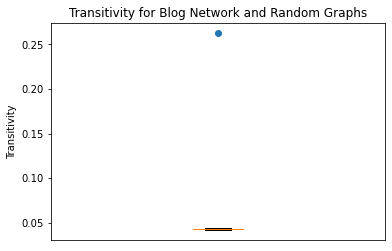

In [19]:
# Plot the transitivity coefficient of the overall network of the LCC and the 100 G(n,p) networks
G0_trans = nx.transitivity(G_0)

trans_all = list(map(nx.transitivity, all_graphs))

plt.boxplot(trans_all)
plt.scatter(1,G0_trans)
plt.title('Transitivity for Blog Network and Random Graphs')
plt.xticks(np.arange(1))
plt.ylabel('Transitivity')

stats.ttest_1samp(trans_all,G0_trans)

We can reject $H_0$. the transitivites are not the same.

## Q4 (can't answer this from lecture of text?)

**Combining the results of Part-3 and Part-4, can we conclude that the undirected LCC of Part-1 network is a small-world network or not? Please provide with your reasons.**

The blog network shows a relationship between clustering coefficient and degree $k$ typical of a real-world netowork. Calculating the small world coeff. $$ \sigma = \frac{\frac{C}{C_r}}{\frac{L}{L_R}} $$

In [20]:
C = nx.average_clustering(G_0)
C_r = nx.average_clustering(random_graph)
L = nx.average_shortest_path_length(G_0)
L_r = nx.average_shortest_path_length(random_graph)

a = C/C_r
b = L/L_r

sigma = a/b
sigma

8.076335836203594

$\sigma$ is larger than one so it is appropriate to classify $G_0$ as a small-world network. Network has stronger clustering compared to similar random graphs and comparable CPL and diameter. 

# Part 5

In [21]:
scc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
G_1 = G.subgraph(scc[0])

triad_counts = nx.triadic_census(G_1)

feedForward_count = triad_counts.get('030T')


directedCycle_count = triad_counts.get('030C')
feedForward_count,directedCycle_count

(39721, 481)

In [22]:
in_degree_seq = [d for n,d in G_1.in_degree()]
out_degree_seq = [d for n,d in G_1.out_degree()]
node_count = G_1.number_of_nodes()
edge_count = G_1.number_of_edges()

print(edge_count)

#create 10 random graphs from in,out seq
random_graphs = [nx.directed_configuration_model(in_degree_seq,out_degree_seq) for i in range(0,10)]

for graph in random_graphs:
    print(graph.number_of_edges())
    

15783
15783
15783
15783
15783
15783
15783
15783
15783
15783
15783


In [23]:
#multi to directed
random_graphs = [nx.DiGraph(graph) for graph in random_graphs]
#remove self-loops
for graph in random_graphs:
    graph.remove_edges_from(nx.selfloop_edges(graph)) 
for graph in random_graphs:
    print(graph.number_of_edges())    

14410
14439
14411
14392
14431
14416
14401
14419
14366
14416


In [24]:
random_triad_counts = [nx.triadic_census(graph) for graph in random_graphs]
random_feedForward_counts = [dictionary.get('030T') for dictionary in random_triad_counts]
random_directedCycle_counts = [dictionary.get('030C') for dictionary in random_triad_counts]

In [25]:
random_feedForward_counts

[39235, 40389, 39722, 41022, 41723, 40184, 39422, 39876, 38790, 40569]

In [26]:
(random_directedCycle_counts)

[3698, 3728, 3686, 3885, 3670, 3709, 3495, 3839, 3668, 3764]

In [27]:
stats.ttest_1samp(random_feedForward_counts,feedForward_count)

Ttest_1sampResult(statistic=1.3431234799763807, pvalue=0.21211788810342355)

In [28]:
stats.ttest_1samp(random_directedCycle_counts,directedCycle_count)

Ttest_1sampResult(statistic=96.68728690192769, pvalue=6.868103601483277e-15)

**Which of the previous triplet types are statistically more common (or less common) in the network of the LCC compared to what we would expense based on chance?**

The above t-test's indicate there is not enough evidence to reject $H_0$ in the case of the feed-forward motifs. That is, we can not assume the the the mean number of FF motifs is different in the random graphs from those of our $G_1$ network. With the directedCycle graphs however, our p value is sufficiently small to reject $H_0$. The random mean number of directed cycle graphs appears to be larger than our $G_1$ graph.


# Part 6

**Note that the Transitivity and the Average Clustering Coefficient are two different metrics. They may often be close but there are also some extreme cases in which the two metrics give very different answers. To see that consider a network in which two nodes A and B are connected to each other as well as to every other node. There are no other links. The total number of nodes is n. What would be the transitivity and average clustering coefficient in this case (you can simplify by assuming that n is quite large)?**

Let $\alpha_i$ be any given node where $\alpha_i$ not in {A,B}. There then exists $n-2$ such $\alpha_i$ nodes. Further, there exists $(n-2)$ triangles consisting of the nodes $\alpha$, A, B. 

The clustering coeff is only nonzero for triangles consisting of nodes: $\alpha, A, B$  so we get average local clustering coeff $$\frac{(n-2)*C_{\alpha_i}}{n} = \frac{(n-2)1/2}{n} = \frac{n-2}{2n} = Avg(C)$$

Triplets are **ordered** sets of three nodes meaning there are 6 different permutations for any given node x: {x,A,B}. If we consider x to be any node that is not A or B then we have $6(n-2)$  triplets because there are $n-2$ nodes that are not A,B. this gives us the following: 

$$ \frac{3(n-2)}{6(n-2)} = \frac{1}{2} = transitivity$$

Therefore we have transitivity 1/2 as a constant with an increase in nodes while Avg(C) approaches 1/2 as n goes to infinity.

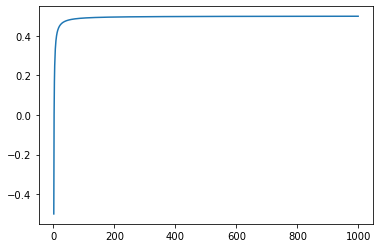

In [29]:
avg_cc = [(x-2)/(2*x) for x in range(1,1000)]


plt.plot(range(1,1000),avg_cc)

## *Old attempt at transitivity, did not account for triplets being ordered sets of 3 (Don't grade below)*

Triplets can take the following forms: (arrows not indicating a directed graph)
$$ \alpha_i , A ,B $$
$$ \alpha_i ,A , \alpha_j $$
$$ \alpha_i ,B ,\alpha_j $$

Therefore, $$(n-2) + \binom{n-2}{2} + \binom{n-2}{2}$$ is the number of triplets in the network. This gives us 

$$(n-2)+(\frac{1}{2}(n-3)(n-2)*2) = (n-2) + (n-3)(n-2) = (n-2)(1+(n-3))$$


and transitivity

$$ 3 \frac{n-2}{(n-2)(n-2)} = \frac{3}{n-2} = transitivity $$

Note: if this is correct limit for avg cc is $\frac{1}{2}$ and limit for transitivity is 0 as n goes to infinity. Don't know how to explain asymptote though....?